In [ ]:
# multi class clasificatioin  have to predict that value from 0 to 9 

In [2]:
# 784 input layer-->28x28 pixels 
# 10 output perceptrons-> multi class clasifications

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [4]:
xtrain.shape #60k images with each being 28x28 pixels as numopy array

(60000, 28, 28)

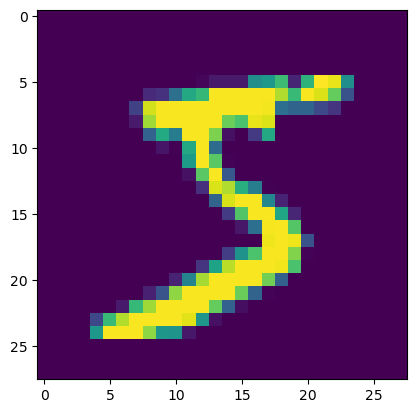

In [5]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0]) # 28 x 28 pixels stored as numpy array

In [6]:
# pixel values lies from 0 to 255 in the array
# first standardize it bringing the range form 0 to 1
xtrain=xtrain/255
xtest=xtest/255
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## model architecture is the first step

In [ ]:
# firstly we need to flatten the data 28x28 into 784 
model=Sequential()
model.add(Flatten(input_shape=(28,28)))# 2d [28x28] to 1d[784,]
model.add(Dense(128,activation='relu'))# 2d to 1d
model.add(Dense(10,activation='softmax'))# 10 nodes--->softmax used when multiclass
# clasiification is used
model.summary() 

In [8]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
# training the model
history=model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9180 - loss: 0.2882 - val_accuracy: 0.9557 - val_loss: 0.1589
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9636 - loss: 0.1256 - val_accuracy: 0.9665 - val_loss: 0.1122
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9745 - loss: 0.0866 - val_accuracy: 0.9722 - val_loss: 0.0949
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0642 - val_accuracy: 0.9719 - val_loss: 0.0936
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9855 - loss: 0.0482 - val_accuracy: 0.9709 - val_loss: 0.1025
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9747 - val_loss: 0.0891
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9758 - val_loss: 0.0883
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0251 - 

In [9]:
ypred=model.predict(xtest)# as probabiltiy
ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[3.69380471e-10, 3.19787231e-15, 1.01060991e-07, ...,
        9.99987125e-01, 1.36409795e-09, 2.21774053e-06],
       [2.73627454e-09, 5.98274880e-07, 9.99998569e-01, ...,
        1.97212855e-16, 8.50958912e-08, 1.38559344e-15],
       [1.35509907e-07, 9.99820054e-01, 1.07173346e-05, ...,
        7.35684225e-05, 8.09493649e-05, 1.17559594e-07],
       ...,
       [4.87750794e-16, 5.46349329e-14, 2.10448694e-12, ...,
        2.07615835e-06, 2.81989787e-09, 7.31681530e-06],
       [6.49891761e-13, 1.16573799e-14, 1.58781541e-16, ...,
        3.88914270e-13, 5.03694027e-05, 6.54104147e-16],
       [1.30359737e-10, 1.88817091e-15, 3.75661724e-11, ...,
        9.85698805e-16, 7.70197447e-12, 4.76191547e-15]], dtype=float32)

In [10]:
from sklearn.metrics import accuracy_score
import numpy as np

In [11]:
y_pred = model.predict(xtest)          # shape = (n_samples, num_classes)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(ytest, y_pred_classes)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step
Test Accuracy: 0.9751


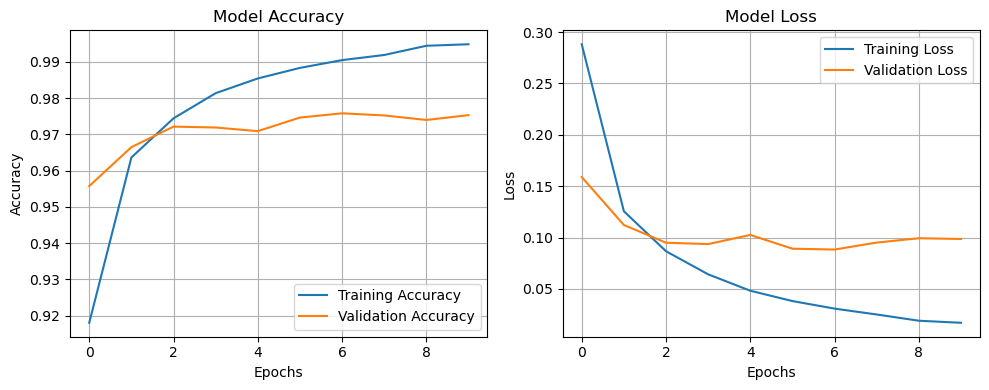

In [12]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


2


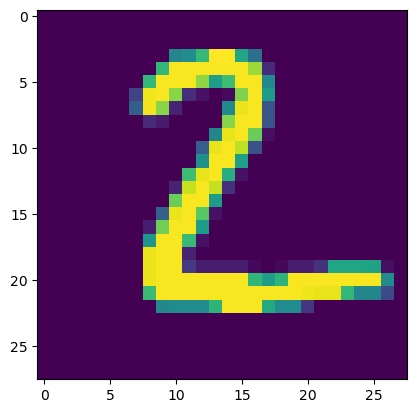

In [13]:
plt.imshow(xtest[1])
print(ytest[1])

In [14]:
model.predict(xtest[1].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[2.7362588e-09, 5.9827261e-07, 9.9999857e-01, 7.0030126e-07,
        1.7924348e-15, 7.4365071e-12, 1.8451033e-09, 1.9721285e-16,
        8.5095401e-08, 1.3855934e-15]], dtype=float32)

In [15]:
import numpy as np

# Predict probability for one image
y_pred = model.predict(xtest[1].reshape(1, 28, 28))

# Convert to discrete output (class label)
predicted_class = np.argmax(y_pred)

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Class: 7


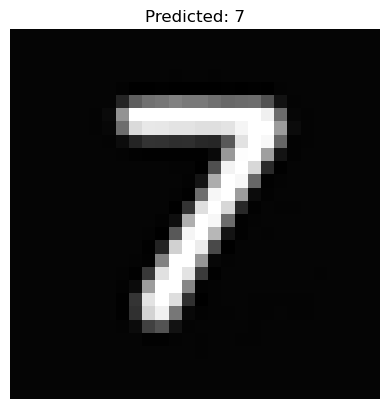

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# 1️⃣ Load the image from your local system
img_path = 'C:/Users/ASUS/Downloads/elt.png'
img = Image.open(img_path).convert('L')  # 'L' converts it to grayscale

# 2️⃣ Resize it to match your model's input
img = img.resize((28, 28))

# 3️⃣ Convert to numpy array
img_array = np.array(img)

# 4️⃣ Normalize pixel values to [0,1]
img_array = img_array / 255.0

# 5️⃣ Reshape to (1, 28, 28)
img_array = img_array.reshape(1, 28, 28)

# 6️⃣ Predict
y_pred = model.predict(img_array)

# 7️⃣ Get the discrete output
predicted_class = np.argmax(y_pred)
print("Predicted Class:", predicted_class)

# 8️⃣ Optional: Visualize the image
plt.imshow(img_array.reshape(28,28), cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()
